In [1]:
import numpy as np
from numpy import sin,cos
import math 
from math import atan2
import matplotlib.pyplot as plt

In [5]:
# 回転行列
def rotation_matrix(deg):
    r = np.radians(deg)
    R = np.matrix([[cos(r),-sin(r),0],
                 [sin(r),cos(r),0],
                 [0,0,1]])
    return R

In [4]:
# 並進ベクトル
def translational_matrix(x,y):
    p = np.matrix([[1.,0.,x],
                  [0.,1.,y],
                  [0.,0.,1.]])
    return p

In [6]:
# 順運動学
def forward_kinematics(T,x,y,deg):
    v = np.matrix([[0.],[0.],[1.]])
    R = rotation_matrix(deg)
    p = translational_matrix(x,y)
    T = T*p*R
    return T

In [7]:
def plot(T):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    x=[]
    y=[]
    for i in range(len(T)):
        
        # リンクの描画
        #plt.plot(x, y,"-g",lw=5,label="link")
        # 関節のびょうｇ
        #plt.plot(x, y,"or",lw=5, ms=10,label="joint")
        x.append(T[i][0,2])
        y.append(T[i][1,2])
        left1 = np.array([T[i][0,2], T[i][0,2]+T[i][0,0]])
        left2 = np.array([T[i][0,2], T[i][0,2]+T[i][0,1]])
        height1 = np.array([T[i][1,2], T[i][1,2]+T[i][1,0]])
        height2 = np.array([T[i][1,2], T[i][1,2]+T[i][1,1]])
        
        ax = plt.gca()
        ax.set_aspect('equal', adjustable='box')
        plt.plot(left1,height1)
        plt.plot(left2,height2)
        plt.xlim(-0.2,7.0)
        plt.ylim(-0.2,7.0)
        plt.grid()
    for i in range(len(T)-1):
        plt.quiver(x[i],y[i],x[i+1]-x[i],y[i+1]-y[i],angles='xy',scale_units='xy',scale=1)
    plt.show()


In [15]:
def ang(T):
    y = T[0,2]
    x = T[1,2]
    ang = atan2(y,x)
    return ang

In [10]:
T0 = np.matrix([[1,0,0],
             [0,1,0],
             [0,0,1]])

In [16]:
T1 = forward_kinematics(T0,2,1,30)
print(T1)
print(math.degrees(ang(T1)))

[[ 0.8660254 -0.5        2.       ]
 [ 0.5        0.8660254  1.       ]
 [ 0.         0.         1.       ]]
63.43494882292201


In [8]:
T1[1,0]

0.49999999999999994

In [9]:
T2 = forward_kinematics(T1,1,1,-45)
print(T2)

[[ 0.96592583  0.25881905  2.3660254 ]
 [-0.25881905  0.96592583  2.3660254 ]
 [ 0.          0.          1.        ]]


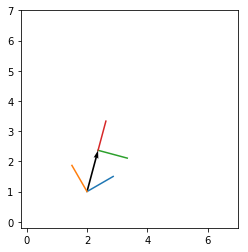

In [10]:
T = [T1,T2]
plot(T)

In [18]:
from math import atan2
import math

In [22]:
math.degrees(atan2(0.5,0.866))

30.000727780827372